                                  # Machine Learning Final Project 
                                   Models : Neural Net
                                   Creator : Sneha Vasudevan

References : 
- https://www.kaggle.com/omkarsabnis/credit-card-fraud-detection-using-neural-networks
-https://www.kaggle.com/simonprevoteaux/machine-learning-for-fraud-detection
-https://github.com/zjost/cc_fraud_proj/blob/master/nn_raw.ipynb
-https://www.tensorflow.org/tutorials/structured_data/imbalanced_data
-https://keras.io/api/optimizers/rmsprop/
-https://www.kaggle.com/deepaksurana/fraud-detection-using-autoencoders-in-keras#Autoencoders-and-Why-You-Should-Use-Them
-https://hub.packtpub.com using-autoencoders-for-detecting-credit-card-fraud-tutorial/
-https://www.sciencedirect.com/science/article/pii/S1877050920306840
-https://www.tensorflow.org/tutorials/structured_data/imbalanced_data 
-https://-developers.google.com/machine-learning/crash-course/generalization/peril-of-overfitting
- http://karpathy.github.io/2019/04/25/recipe/#2-set-up-the-end-to-end-trainingevaluation-skeleton--get-dumb-baselines
- https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/


In [1]:
# IMPORTING REQUIRED MODULES
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)
import itertools
import warnings
warnings.filterwarnings("ignore")
# NEURAL NETWORKS MODULES
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# KERAS MODULES
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import Callback
import keras.backend as kb
import tensorflow as tf
print(tf.__version__)
import keras
import keras.utils
from keras import utils as np_utils
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras.models import Model, load_model
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing



SEED = 42

1.18.4
1.0.4


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.10.1


Using TensorFlow backend.


2.2.0


In [2]:
# Set up shared drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Load dataset 
datapath = '/content/drive/Shared drives/Machine Learning/Code/df_new.csv'
df = pd.read_csv(datapath)
#df = pd.read_csv("df_new.csv", low_memory= False)
#df.shape

In [4]:
#removing first column
df = df.drop(df.columns[0], axis = 1)
df.head(3)

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,day,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,CC,CM,quartile1,quartile2,quartile3,quartile4
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0.0,9839.64,0,0,0,0,1,0,0,1,1,0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0.0,1864.28,0,0,0,0,1,0,0,1,1,0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0.0,181.00,0,0,0,0,0,1,1,0,1,0,0,0


In [0]:
# dropping Step. Column Day created from Step will be used instead. 
df = df.drop('step', axis=1) 

In [6]:
df.head(5)

,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,day,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,CC,CM,quartile1,quartile2,quartile3,quartile4
0,9839.64,170136.0,160296.36,0.0,0.0,0,0.0,9839.64,0,0,0,0,1,0,0,1,1,0,0,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0.0,1864.28,0,0,0,0,1,0,0,1,1,0,0,0
2,181.00,181.0,0.00,0.0,0.0,1,0.0,181.00,0,0,0,0,0,1,1,0,1,0,0,0
3,181.00,181.0,0.00,21182.0,0.0,1,0.0,21363.00,0,0,1,0,0,0,1,0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0.0,11668.14,0,0,0,0,1,0,0,1,1,0,0,0


In [7]:
#dataset imbalance 
notfraud, fraud = np.bincount(df['isFraud'])
total = notfraud + fraud
print('Examples:\n    Total: {}\n    Fraud: {} ({:.2f}% of total)\n'.format(
    total, fraud, 100 * fraud / total))

Examples:
    Total: 6362620
    Fraud: 8213 (0.13% of total)



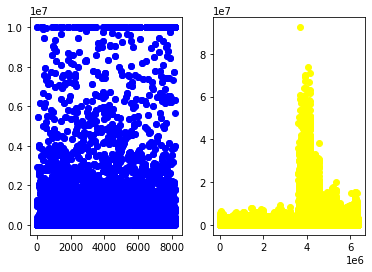

In [8]:
# PLOTTING FRAUD VS NON FRAUD for amount of transaction in local currency
color = {1:'blue',0:'yellow'}
fraudlist = df[df.isFraud == 1]
notfraudlist = df[df.isFraud == 0]
fig,axes = plt.subplots(1,2)
axes[0].scatter(list(range(1,fraudlist.shape[0]+1)),fraudlist.amount,color='blue')
axes[1].scatter(list(range(1,notfraudlist.shape[0]+1)),notfraudlist.amount,color='yellow')
plt.show()

In [9]:
print("Dataset Shape: ", df.shape)
print("Maximum Transaction Value: ", np.max(df.amount))
print("Minimum Transaction Value: ", np.min(df.amount))

print("Maximum oldBalanceOrig: ", np.max(df.oldBalanceOrig))
print("Minimum oldBalancOrig: ", np.min(df.oldBalanceOrig))

print("Maximum newBalanceOrig: ", np.max(df.newBalanceOrig))
print("Minimum newBalancOrig: ", np.min(df.newBalanceOrig))

print("Maximum oldBalanceDest: ", np.max(df.oldBalanceDest))
print("Minimum oldBalanceDest: ", np.min(df.oldBalanceDest))

print("Maximum newBalanceDest: ", np.max(df.newBalanceDest))
print("Minimum newBalanceDest: ", np.min(df.newBalanceDest))

print("Maximum errorBalanceOrig: ", np.max(df.errorBalanceOrig))
print("Minimum errorBalanceOrig: ", np.min(df.errorBalanceOrig))

print("Maximum errorBalanceDest: ", np.max(df.errorBalanceDest))
print("Minimum errorBalanceDest: ", np.min(df.errorBalanceDest))


Dataset Shape:  (6362620, 20)
Maximum Transaction Value:  92445516.64
Minimum Transaction Value:  0.0
Maximum oldBalanceOrig:  59585040.37
Minimum oldBalancOrig:  0.0
Maximum newBalanceOrig:  49585040.37
Minimum newBalancOrig:  0.0
Maximum oldBalanceDest:  356015889.35
Minimum oldBalanceDest:  0.0
Maximum newBalanceDest:  356179278.92
Minimum newBalanceDest:  0.0
Maximum errorBalanceOrig:  92445516.64
Minimum errorBalanceOrig:  -0.010000001639127731
Maximum errorBalanceDest:  13191233.98
Minimum errorBalanceDest:  -75885725.63000001


In [10]:
for col in df.columns: 
    print(col)

amount
oldBalanceOrig
newBalanceOrig
oldBalanceDest
newBalanceDest
isFraud
errorBalanceOrig
errorBalanceDest
day
CASH_IN
CASH_OUT
DEBIT
PAYMENT
TRANSFER
CC
CM
quartile1
quartile2
quartile3
quartile4


In [0]:
#large ranges for the variables below, therefore converting to log-space 
cleaned_df = df.copy() # creating a copy to work on 

eps=0.001 # 0 => 0.1¢
cleaned_df['Log_amount'] = np.log(cleaned_df.pop('amount')+eps)

cleaned_df['Log_oldBalanceOrig'] = np.log(cleaned_df.pop('oldBalanceOrig')+eps)

cleaned_df['Log_newBalanceOrig'] = np.log(cleaned_df.pop('newBalanceOrig')+eps)

cleaned_df['Log_oldBalanceDest'] = np.log(cleaned_df.pop('oldBalanceDest')+eps)

cleaned_df['Log_newBalanceDest'] = np.log(cleaned_df.pop('newBalanceDest')+eps)

cleaned_df['Log_errorBalanceOrig'] = np.log(cleaned_df.pop('errorBalanceOrig')+eps)

cleaned_df['Log_errorBalanceDest'] = np.log(cleaned_df.pop('errorBalanceDest')+eps)

In [0]:
#print("Maximum day: ", np.max(df.day))
#print("Minimum day: ", np.min(df.day))

#print("Maximum Cash_in: ", np.max(df.CASH_IN))
#print("Minimum Cash_in: ", np.min(df.CASH_IN))

#print("Maximum Cash_out: ", np.max(df.CASH_OUT))
#print("Minimum Cash_out: ", np.min(df.CASH_OUT))


In [13]:
cleaned_df.head(5)

,isFraud,day,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,CC,CM,quartile1,quartile2,quartile3,quartile4,Log_amount,Log_oldBalanceOrig,Log_newBalanceOrig,Log_oldBalanceDest,Log_newBalanceDest,Log_errorBalanceOrig,Log_errorBalanceDest
0,0,0,0,0,0,1,0,0,1,1,0,0,0,9.194175,12.044353,11.984780,-6.907755,-6.907755,-6.907755,9.194175
1,0,0,0,0,0,1,0,0,1,1,0,0,0,7.530631,9.964065,9.872240,-6.907755,-6.907755,-6.907755,7.530631
2,1,0,0,0,0,0,1,1,0,1,0,0,0,5.198503,5.198503,-6.907755,-6.907755,-6.907755,-6.907755,5.198503
3,1,0,0,1,0,0,0,1,0,1,0,0,0,5.198503,5.198503,-6.907755,9.960907,-6.907755,-6.907755,9.969416
4,0,0,0,0,0,1,0,0,1,1,0,0,0,9.364617,10.634749,10.305141,-6.907755,-6.907755,-6.907755,9.364617


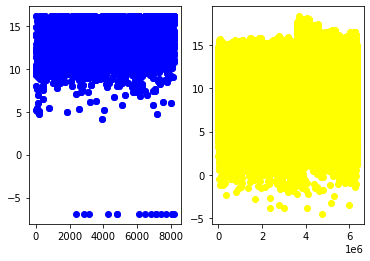

In [14]:
##PLOTTING FRAUD VS NON FRAUD for Log_amount of transaction in local currency
color = {1:'blue',0:'yellow'}
fraudlist = cleaned_df[cleaned_df.isFraud == 1]
notfraudlist = cleaned_df[cleaned_df.isFraud == 0]
fig,axes = plt.subplots(1,2)
axes[0].scatter(list(range(1,fraudlist.shape[0]+1)),fraudlist.Log_amount,color='blue')
axes[1].scatter(list(range(1,notfraudlist.shape[0]+1)),notfraudlist.Log_amount,color='yellow')
plt.show()
#Looks a bit more uniform ie. less variance? 

# Test-Train Split and Data Normalization

In [15]:
#Creating X dataframe (predictors). 
#It should include every feature except for the target variable which is "isFraud".
X = df.drop('isFraud', axis=1) 
X.shape

(6362620, 19)

In [16]:
y = df['isFraud']
y.value_counts() # data is unbalanced

0    6354407
1       8213
Name: isFraud, dtype: int64

In [0]:
# Use a utility from sklearn to split and shuffle our dataset.
#Split into train / test set using an 80/20 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=SEED) #random state = SEED 

In [18]:
print("Elements in the training set:" , np.bincount(y_train))
print("Elements in the testing set:" , np.bincount(y_test))
#print(X_train)

Elements in the training set: [5083503    6593]
Elements in the testing set: [1270904    1620]


Normalize the input features using the sklearn MinMaxScaler. MinMaxScaler is used instead of standard scaler since the variables is highli skewed. Standard scalar is typicaly used when the distribution is gaussian.
This will set the variables between 0 & 1. This is done after log transformation to ensure all feature samples have valid enter to the model (ie values not equal to 0)

Note: The MinMaxScaler is only fit using the `train_features` to be sure the model is not peeking at the validation or test sets. Also this does not affect the binary variables/ features. So in the scaling below, I use the entire feature set, instead of just the continous variables 

In [0]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)

### Test - Train Split

In [0]:
# FUNCTION FOR TRAINING THE MODEL
def trainmodel(model):
    model.fit(x_train,y_train)

In [0]:
# FUNCTION TO MAKE PREDICTIONS
def predictmodel(model):
    y_pred = model.predict(X_test)
    f,t,thresholds = metrics.roc_curve(y_test,y_pred)
    cm = metrics.confusion_matrix(y_test,y_pred)
    print("Score:", metrics.auc(f,t))
    print("Classification report:")
    print(metrics.classification_report(y_test,y_pred))
    print("Confusion Matrix:")
    print(cm)

In [0]:
# FUNCTION TO MAKE PREDICTIONS
def predictmodeln(model):
    y_pred = model.predict_classes(X_test)
    f,t,thresholds = metrics.roc_curve(y_test,y_pred)
    cm = metrics.confusion_matrix(y_test,y_pred)
    print("Score:", metrics.auc(f,t))
    print("Classification report:")
    print(metrics.classification_report(y_test,y_pred))
    print("Confusion Matrix:")
    print(cm)

In [0]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

#### **Improving model performance using initial bias** (Not Used)

Since this data is highly imbalanced, it is recommended to set an initial bias. I havent figured that out yet, so skipping for now. An initial bias helps with intial convergence.

The correct bias to set can be derived from:

$$ p_0 = pos/(pos + neg) = 1/(1+e^{-b_0}) $$
$$ b_0 = -log_e(1/p_0 - 1) $$
$$ b_0 = log_e(pos/neg)$$

In [24]:
initial_bias = np.log([fraud/notfraud])
initial_bias

array([-6.6511856])

Set that as the initial bias, and the model will give much more reasonable initial guesses.

Per calculation above this initial bias value is : **-6.6511856**

The simple neural network defined has the following layers 
- dense hidden layer 
- dropout layer to reduce overfitting 
- sigmoid layer preferred since it returns the probability of a transaction being fraudulent. 

In [0]:
# DEFINING THE NEURAL NETWORK
model = Sequential()
model.add(Dense(16,activation='relu',input_dim= X_train.shape[-1]))
model.add(Dropout(rate = 0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [26]:
# CHECKING THE OUTPUT OF THE DEFINED NETWORK
history = model.fit(X_train,y_train,epochs=100, batch_size=1000) #set large batch size to ensure it captures the minority class samples. 

Epoch 1/100
5090096/5090096 [==============================] - 22s 4us/step - loss: 2944.9326 - tp: 1589.1273 - fp: 90338.4688 - tn: 2452332.0000 - fn: 1740.0165 - accuracy: 0.9447 - precision: 0.0154 - recall: 0.4826 - auc: 0.7429
Epoch 2/100
5090096/5090096 [==============================] - 22s 4us/step - loss: 4.7751 - tp: 4172.7856 - fp: 138199.3438 - tn: 7487994.0000 - fn: 5728.3228 - accuracy: 0.9806 - precision: 0.0292 - recall: 0.4256 - auc: 0.7858
Epoch 3/100
5090096/5090096 [==============================] - 22s 4us/step - loss: 0.3647 - tp: 5194.3003 - fp: 146067.9531 - tn: 12563650.0000 - fn: 11287.4951 - accuracy: 0.9875 - precision: 0.0343 - recall: 0.3190 - auc: 0.7207
Epoch 4/100
5090096/5090096 [==============================] - 22s 4us/step - loss: 0.1138 - tp: 5247.3716 - fp: 146279.2656 - tn: 17647086.0000 - fn: 17822.7500 - accuracy: 0.9908 - precision: 0.0346 - recall: 0.2290 - auc: 0.6541
Epoch 5/100
5090096/5090096 [==============================] - 23s 5us/ste

In [27]:
print(predictmodeln(model))

Score: 0.5003086419753087
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       1.00      0.00      0.00      1620

    accuracy                           1.00   1272524
   macro avg       1.00      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
[[1270904       0]
 [   1619       1]]
None


In [28]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc'])


In [29]:
results = model.evaluate(X_test, y_test,batch_size=1000)
print('test results:', results)

1272524/1272524 [==============================] - 4s 3us/step
test results: [0.01127775752461558, 5547.029296875, 156218.6875, 506407392.0, 654564.25, 0.999548614025116, 0.0342906191945076, 0.00840318389236927, 0.5052555799484253]


Recall and precision are really low, implying that this model may not be good for validating imbalanced fraud. We may need to look into assigning weights or something (initial bias) to the model to improve its performance. I tried multiple layers, and combinations, the above model was the best out of all, but far from the best model that we can create. 